In [1]:
import pandas as pd
import os

import statistics
import numpy as np


In [3]:
NUMBER_OF_CLIENTS = 19
NUMBER_OF_ITERATIONS = 200
inputFolders = "result_smote_epoch_1_rounds_200/"

In [4]:
allData = []

df = pd.DataFrame(columns=["round","min_accuracy","max_accuracy","global_accuracy","median","avg","sd","clients"])
# pegar acurática
for iterationI in range(0,NUMBER_OF_ITERATIONS):
    countCli = 0
    itetarionAccuracy = []
    for clientI in range(0,NUMBER_OF_CLIENTS):
        file = inputFolders+"local_model_results_MLP_unbalanced_client_"+str(clientI)+"_round_" +str(iterationI)+".csv" # local_model_results_MLP_unbalanced_client_0_round_1
        
        if(os.path.isfile(file)):
            dataF = pd.read_csv(file)
            accuracy = dataF['accuracy'][0]
            itetarionAccuracy.append(accuracy)
            countCli = countCli + 1
    # global accuracy
    file = inputFolders+"global_model_MLP_client_0_round_" +str(iterationI)+".csv" # local_model_results_MLP_unbalanced_client_0_round_1
    dataF = pd.read_csv(file)
    global_accuracy = dataF['accuracy'][0]
    # global_model_MLP_unbalanced_client_0_round_1
    # iterationI
    minAcc = min(itetarionAccuracy)
    maxAcc = max(itetarionAccuracy)
    avgAcc = sum(itetarionAccuracy)/len(itetarionAccuracy)
    sd = np.std(itetarionAccuracy)
    median = statistics.median(itetarionAccuracy)

    # countCli
    print("Round ",iterationI,"Clients: ",countCli)
    ## add on dataframe
    values = [[iterationI,minAcc,maxAcc,global_accuracy,median,avgAcc,sd,countCli]]
    dfConc = pd.DataFrame(values,
                          columns=["round","min_accuracy","max_accuracy","global_accuracy","avg","median","sd","clients"])
    # append
    df = pd.concat([df,dfConc])

FileNotFoundError: [Errno 2] No such file or directory: 'result_smote_epoch_1_rounds_200/global_model_MLP_unbalanced_client_0_round_0.csv'

In [ ]:
itetarionAccuracy

In [5]:
max(itetarionAccuracy)

0.835878654884052

In [6]:
min(itetarionAccuracy)

0.5797624696044126

In [7]:
dfConc

,round,min_accuracy,max_accuracy,global_accuracy,avg,median,sd,clients
0,119,0.579762,0.835879,0.823809,0.810839,0.76828,0.081782,14


In [8]:
df

,round,min_accuracy,max_accuracy,global_accuracy,median,avg,sd,clients
0,0,0.802799,0.813660,0.809383,0.808230,0.808230,0.005430,2
0,1,0.588459,0.827976,0.817619,0.769188,0.802659,0.067264,19
0,2,0.518230,0.841179,0.823476,0.777331,0.805594,0.070377,19
0,3,0.557626,0.842062,0.833884,0.790477,0.811629,0.062154,19
0,4,0.543881,0.840305,0.839852,0.795457,0.812971,0.063384,19
...,...,...,...,...,...,...,...,...
0,115,0.579399,0.828250,0.825893,0.767563,0.812700,0.075479,14
0,116,0.646603,0.833425,0.822490,0.776679,0.809145,0.062014,14
0,117,0.630278,0.833388,0.824187,0.769300,0.811547,0.070669,14
0,118,0.603627,0.834107,0.822379,0.768169,0.810135,0.073842,14


In [9]:
print("Global accuracy",df["global_accuracy"].max())

print("local accuracy",df["max_accuracy"].max())

Global accuracy 0.8398523219263389
local accuracy 0.8454421445940336


In [10]:

from datetime import datetime
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


<AxesSubplot: xlabel='round'>

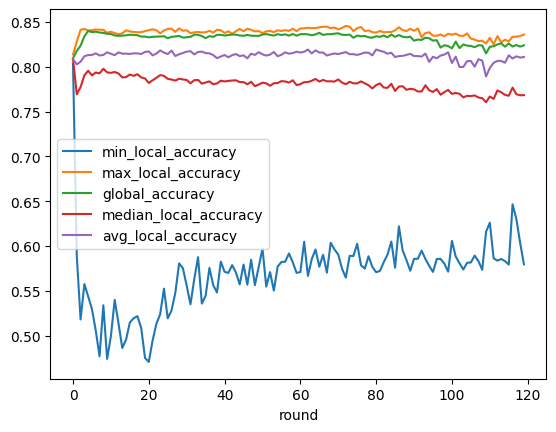

In [11]:
metrics = ["round","min_accuracy","max_accuracy","global_accuracy","median","avg"]
metrics = ["round","min_local_accuracy","max_local_accuracy","global_accuracy","median_local_accuracy","avg_local_accuracy"]

df['min_local_accuracy'] = df['min_accuracy']
df['max_local_accuracy'] = df['max_accuracy']
df['median_local_accuracy'] = df['median']
df['avg_local_accuracy'] = df['avg']

dfMetricsClass = df[metrics]
lines = dfMetricsClass.plot.line(x='round')

lines

In [12]:
lines.figure.savefig('metrics_flower_isabela-smote.pdf')